In [1]:
from LogDict import FlashLogDict
import numpy
import matplotlib.pyplot as pyplot
from types import SimpleNamespace

In [2]:
def LogNamespace(logfile):
    logdict = FlashLogDict(logfile, process=True)
    log = SimpleNamespace(evolution = 0., communication = 0., nucleation = 0., multiphase = 0.,
                          incomp = 0., heat = 0., io = 0., poisson = 0., simtime = 0., walltime = 0., iters=0)

    metric = "time sec"
    
    for key in logdict.keys():
        if key == "evolution":
            log.evolution = log.evolution + logdict[key][metric]
        if key == "guardcell internal":
            log.communication = log.communication + logdict[key][metric]
        if key == "Grid_solvePoisson":
            log.poisson = log.poisson + logdict[key][metric]
        if "sim_heater" in key:
            log.nucleation = log.nucleation + logdict[key][metric]
        if "Multiphase" in key:
            log.multiphase = log.multiphase + logdict[key][metric]
        if ("IncompNS" in key) or (key == "sim_outletSetForcing"):
            log.incomp = log.incomp + logdict[key][metric]
        if "HeatAD" in key:
            log.heat = log.heat + logdict[key][metric]
        if key == "IO_output":
            log.io = log.io + logdict[key][metric]
            
    return log

In [3]:
SummitNodes25 = LogNamespace("../../simulation/FlowBoiling/Example3D/jobnode.archive/2023-10-03/INS_Flow_Boiling.log")                              
SummitNodes12 = LogNamespace("../../simulation/FlowBoiling/WeakScaling/nodes12/jobnode.archive/2023-10-03/INS_Flow_Boiling.log")
SummitNodes05 = LogNamespace("../../simulation/FlowBoiling/WeakScaling/nodes05/jobnode.archive/2023-10-03/INS_Flow_Boiling.log")
HPC3 = LogNamespace("./jobnode.archive/hpc3/INS_Pool_Boiling.log")

In [4]:
SummitNodes25.simtime = 0.5*10
SummitNodes25.walltime = round(6553.903/60/60,1)
SummitNodes25.iters=5849

SummitNodes12.simtime = 0.5*10
SummitNodes12.walltime = round(5882.297/60/60,1)
SummitNodes12.iters=5569

SummitNodes05.simtime = 0.5*10
SummitNodes05.walltime = round(4142.082/60/60,1)
SummitNodes05.iters=4931

HPC3.simtimes = 1*10
HPC3.walltime = round(19999.007/60/60,1)
HPC3.iters=9634

NameError: name 'log' is not defined

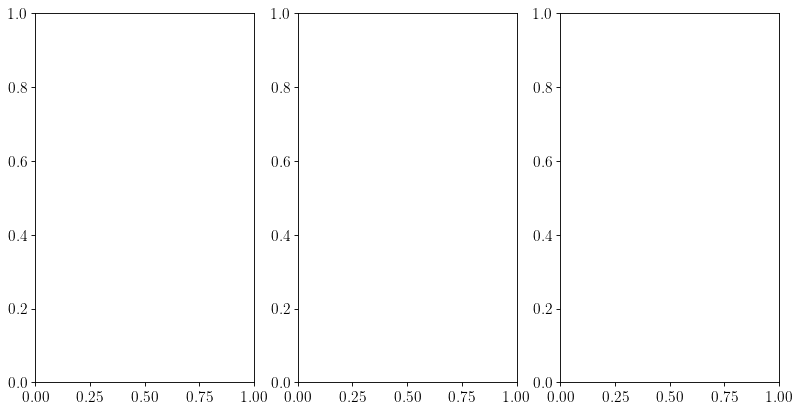

In [5]:
# Plot figure
pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)
figure = pyplot.figure(figsize=(12, 6), dpi=80)

axList = figure.subplots(1,3)

for index, ax in enumerate(axList):

    labels = ["evolution"]
    
    layer1 = [log["AmrMesh::MakeNewGrids"]["Incl. Avg"], 0]
    layer2 = [0, log["Bittree-btCheckRefine"]["Incl. Avg"]]
    layer3 = [0, log["Bittree-checkNeighborsRefine"]["Incl. Avg"]]
    layer4 = [0, log["Bittree-btCheckDerefine"]["Incl. Avg"]]

    bar1 = ax.bar(labels, layer1, color=['steelblue', 'black'], edgecolor="black")
    bar2 = ax.bar(labels, layer2, color=['black', 'seagreen'], edgecolor="black")
    bar3 = ax.bar(labels, layer3, color=['black', 'palegoldenrod'], edgecolor="black")
    bar4 = ax.bar(labels, layer4, bottom=layer2, color=["black", "maroon"], edgecolor="black")

    #ax.set_title(f"AMReX Regridding in Bittree mode at {ranks} ranks")
    ax.set_ylabel(r"Time (s)")

ax.legend([bar1[0],bar2[1], bar3[1],bar4[1]],["AmrMesh:MakeNewGrids", "Bittree-btCheckRefine", 
                                              "Bittree-checkNeighborsRefine", "Bittree-btCheckDerefine"],
          ncol=2,loc="lower center",bbox_to_anchor=(0.5, -0.5),)

pyplot.tight_layout()